## Simulation with Bayesian Information Criterion:

### Estimating the number of components of NMF:
<img src="exp_3comp.PNG" alt="NMF on documents" style="width: 80%"/>



In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import isspmatrix
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import NMF

In [2]:
# ==============================
# Simulation

# Assumptions
n=20
k=3 # Number of components (to be estimated)
M= 400 # Total number of data
np.random.seed(12345)

In [3]:
# Parameters to be estimated
# A_norm: n by k
# B_norm: k by n
# r_prob: k probabilities with sum 1

In [4]:
A_norm = np.zeros((n,k))
A_norm[0,0] = 1.0
A_norm[1,1] = 0.5
A_norm[2,1] = 0.5
A_norm[3,2] = 1.0

A_norm

array([[1. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])

In [5]:
B_norm = np.zeros((k,n))
B_norm[0,1] = 0.5
B_norm[0,2] = 0.5
B_norm[1,3] = 1.0
B_norm[2,4] = 0.5
B_norm[2,5] = 0.5
B_norm

array([[0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [6]:
r_prob = np.array([0.3,0.2,0.5])
r_prob

array([0.3, 0.2, 0.5])

In [7]:
np.sqrt(M * r_prob)

array([10.95445115,  8.94427191, 14.14213562])

In [8]:
np.diag(np.sqrt(M * r_prob))

array([[10.95445115,  0.        ,  0.        ],
       [ 0.        ,  8.94427191,  0.        ],
       [ 0.        ,  0.        , 14.14213562]])

In [9]:
# Construct unnormalized A, B
A = np.dot(A_norm, np.diag(np.sqrt(M * r_prob)))
B = np.dot(np.diag(np.sqrt(M * r_prob)), B_norm)
print(A)
print(B)

[[10.95445115  0.          0.        ]
 [ 0.          4.47213595  0.        ]
 [ 0.          4.47213595  0.        ]
 [ 0.          0.         14.14213562]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[0.         5.47722558 5.47722558 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0

In [10]:
# Construct the matrix of average frequencies
# N.B. A, B are dense, but X should be sparse.

tmp = [(i,j,np.dot(A[i,:],B[:,j])) for i in np.nonzero(A)[0] for j in np.nonzero(B)[1]]
row_idx = [x[0] for x in tmp if x != 0.0]
col_idx = [x[1] for x in tmp if x != 0.0]
dat = [x[2] for x in tmp if x != 0.0]
print(tmp)

[(0, 1, 60.0), (0, 2, 60.0), (0, 3, 0.0), (0, 4, 0.0), (0, 5, 0.0), (1, 1, 0.0), (1, 2, 0.0), (1, 3, 40.00000000000001), (1, 4, 0.0), (1, 5, 0.0), (2, 1, 0.0), (2, 2, 0.0), (2, 3, 40.00000000000001), (2, 4, 0.0), (2, 5, 0.0), (3, 1, 0.0), (3, 2, 0.0), (3, 3, 0.0), (3, 4, 100.00000000000001), (3, 5, 100.00000000000001)]


In [11]:
X_avg = csr_matrix((dat, (row_idx, col_idx)), shape=(n,n))
X_avg.toarray()
print(isspmatrix(X_avg))

# For debug, compare them:
print(X_avg.toarray())
print(np.dot(A,B))

True
[[  0.  60.  60.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  40.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  40.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 100. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0

In [12]:
noise = 1.0
X_avg = np.dot(A,B) + noise
X = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    X[i,j] = np.random.poisson(X_avg[i,j],1)
X

array([[  1.,  53.,  62.,   3.,   2.,   0.,   0.,   4.,   2.,   0.,   1.,
          3.,   0.,   2.,   1.,   1.,   3.,   1.,   0.,   0.],
       [  1.,   1.,   1.,  43.,   1.,   2.,   0.,   1.,   0.,   2.,   3.,
          0.,   1.,   0.,   0.,   2.,   2.,   1.,   1.,   0.],
       [  1.,   4.,   1.,  25.,   0.,   1.,   0.,   1.,   2.,   1.,   2.,
          2.,   1.,   2.,   1.,   2.,   0.,   1.,   0.,   2.],
       [  1.,   2.,   0.,   1.,  89., 114.,   1.,   1.,   1.,   0.,   0.,
          3.,   1.,   0.,   1.,   2.,   1.,   2.,   3.,   3.],
       [  0.,   0.,   1.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,   0.,
          1.,   2.,   1.,   1.,   1.,   1.,   2.,   1.,   1.],
       [  1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.],
       [  3.,   1.,   3.,   0.,   1.,   1.,   2.,   1.,   1.,   0.,   1.,
          1.,   0.,   1.,   1.,   2.,   2.,   2.,   0.,   1.],
       [  2.,   1.,   1.,   2.,   0.,   0

In [13]:
# ==============================
# Model of NMF

n_components = 3

# m = NMF(n_components = n_components,
#         init = 'random', random_state = 123,
#         alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
        init = 'random', random_state = 123,
        alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)

m.get_params()
print("#iterations= %d" % m.n_iter_)
print("reconstruction error= %e" % m.reconstruction_err_)

W = m.fit_transform(X)
H = m.components_
print(W)
print(H)


Epoch 10 reached after 0.002 seconds, error: 22.084866
Epoch 20 reached after 0.004 seconds, error: 21.971558
Epoch 30 reached after 0.005 seconds, error: 21.962936
Epoch 40 reached after 0.007 seconds, error: 21.961651
#iterations= 40
reconstruction error= 2.196165e+01
Epoch 10 reached after 0.002 seconds, error: 22.084866
Epoch 20 reached after 0.003 seconds, error: 21.971558
Epoch 30 reached after 0.004 seconds, error: 21.962936
Epoch 40 reached after 0.006 seconds, error: 21.961651
[[7.79446384e-14 1.23313576e+01 4.43971920e-04]
 [1.77749466e-01 2.85451619e-02 3.01388510e+00]
 [6.10416990e-02 3.23238855e-01 2.27919831e+00]
 [1.28908000e+01 9.24110881e-09 7.14852598e-06]
 [1.32483102e-01 8.46630103e-02 7.06255364e-01]
 [6.26698440e-02 6.74538715e-19 3.55173567e-01]
 [1.25172912e-01 4.02221174e-01 8.88896184e-01]
 [5.16074852e-33 1.59016952e-01 8.85590175e-01]
 [1.37269790e-01 9.72643850e-02 2.82907599e-01]
 [1.94043515e-01 1.71615408e-01 8.57595952e-01]
 [5.90784399e-02 7.98031239e-

In [14]:
# Look at the result more closely
np.dot(W, H)

array([[1.06815268e+00, 5.34763863e+01, 6.15345615e+01, 2.62059532e+00,
        1.86501954e+00, 1.13715852e-06, 4.00224461e-04, 4.31471116e+00,
        1.90346006e+00, 4.06981068e-04, 1.13995907e+00, 2.96851582e+00,
        3.24257240e-04, 1.98282515e+00, 1.03227926e+00, 9.70655618e-01,
        3.09040799e+00, 1.06277613e+00, 3.23808308e-04, 4.31398366e-04],
       [3.37887232e+00, 1.37885566e+00, 6.96582236e-01, 1.35917211e+01,
        1.20882859e+00, 1.58776651e+00, 2.73161617e+00, 3.87109735e+00,
        1.99714128e+00, 2.76277423e+00, 3.03468722e+00, 2.58449575e+00,
        2.21575968e+00, 3.19800040e+00, 2.68781578e+00, 3.22136685e+00,
        3.44577808e+00, 3.17673594e+00, 2.24778268e+00, 2.97548288e+00],
       [2.57568998e+00, 2.33993546e+00, 2.03204666e+00, 1.03373580e+01,
        4.62533780e-01, 5.48448411e-01, 2.05966522e+00, 3.02688626e+00,
        1.55143972e+00, 2.08930007e+00, 2.32280452e+00, 2.01000967e+00,
        1.66962216e+00, 2.46692506e+00, 2.05197444e+00, 2.4488

In [15]:
# Normalize W, H

W_norm = W / np.sum(W,axis=0,keepdims=True)
#print(np.sum(W_norm, axis=0))

H_norm = H / np.sum(H,axis=1,keepdims=True)
#print(np.sum(H_norm, axis=1))

W_sum = np.sum(W,axis=0,keepdims=True).ravel()
H_sum = np.sum(H,axis=1,keepdims=True).ravel()
print(W_sum)
print(H_sum)
# "Probability" of each component
print(W_sum * H_sum / np.dot(W_sum, H_sum))

print(np.dot(W_sum, H_sum))
# This should be equal to
print(np.sum(X))

[15.29447008 15.58908851 17.45425347]
[17.53182617 11.27398716 19.4284348 ]
[0.3424521  0.22445873 0.43308918]
783.0000000000001
783.0


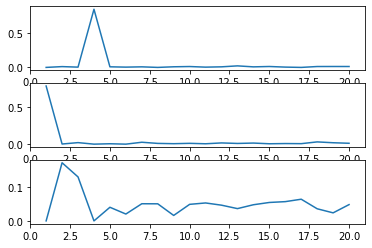

In [16]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.plot(np.arange(n)+1, W_norm[:,i])
  plt.xlim([0,W_norm.shape[0]+1])
  
# plt.show(block=False)

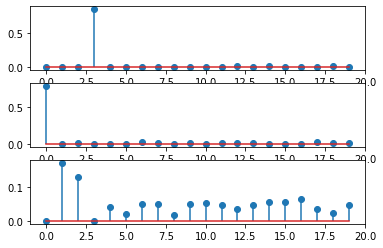

In [17]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(W_norm[:,i], use_line_collection=True)
  plt.xlim([-1,W_norm.shape[0]])

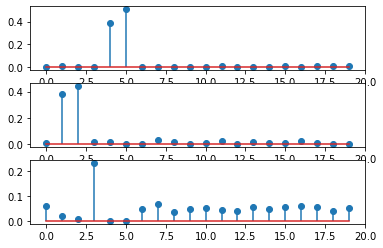

In [18]:
plt.figure()
for i in range(n_components):
  plt.subplot(n_components,1,i+1)
  plt.stem(H_norm[i,:], use_line_collection=True)
  plt.xlim([-1,H_norm.shape[1]])

In [19]:
# ----------
# BIC (Bayesian Information Criterion)

ks = np.array(range(1,6))  # #components
bic1 = np.zeros(len(ks))  # BIC 1st term: minus of log likelihood
bic2 = np.zeros(len(ks))  # BIC 2nd term: penalty or Occam's factor

for i in range(len(ks)):
  n_components = ks[i]
  m = NMF(n_components = n_components, beta_loss = 'kullback-leibler', solver = 'mu',
          init = 'random', random_state = 123,
          alpha = 0.0, l1_ratio = 1.0, verbose=True).fit(X)
  bic1[i] = 0.5 * (m.reconstruction_err_ ** 2)
  bic2[i] = 2 * n * n_components * np.log(n)

bic = bic1 + bic2

Epoch 10 reached after 0.003 seconds, error: 37.095478
Epoch 20 reached after 0.006 seconds, error: 37.095478
Epoch 10 reached after 0.003 seconds, error: 28.995587
Epoch 20 reached after 0.005 seconds, error: 28.945244
Epoch 30 reached after 0.009 seconds, error: 28.942092
Epoch 10 reached after 0.001 seconds, error: 22.084866
Epoch 20 reached after 0.003 seconds, error: 21.971558
Epoch 30 reached after 0.004 seconds, error: 21.962936
Epoch 40 reached after 0.005 seconds, error: 21.961651
Epoch 10 reached after 0.001 seconds, error: 22.436962
Epoch 20 reached after 0.003 seconds, error: 21.050477
Epoch 30 reached after 0.004 seconds, error: 20.611136
Epoch 40 reached after 0.007 seconds, error: 20.267961
Epoch 50 reached after 0.009 seconds, error: 20.189164
Epoch 60 reached after 0.010 seconds, error: 20.066048
Epoch 70 reached after 0.012 seconds, error: 19.914501
Epoch 80 reached after 0.014 seconds, error: 19.324925
Epoch 90 reached after 0.015 seconds, error: 18.884008
Epoch 100 

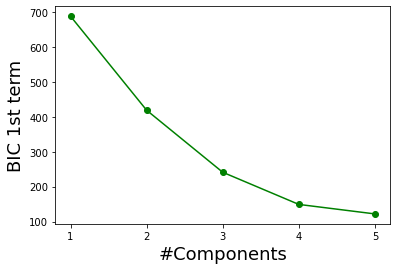

In [20]:
# plotting each BIC terms from the equation bic = bic1 + bic2

plt.figure()
plt.plot(ks, bic1, color="green", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 1st term", fontsize=18)
plt.savefig('BIC1.eps', format='eps')
# plt.show()

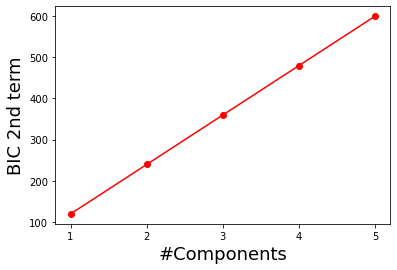

In [21]:
plt.figure()
plt.plot(ks, bic2, color="red", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC 2nd term", fontsize=18)
plt.savefig('BIC2.eps', format='eps')
# plt.show()

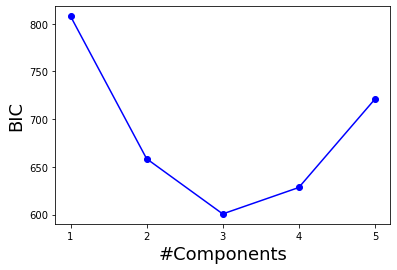

In [22]:
plt.figure()
plt.plot(ks, bic, color="blue", marker='o')
plt.xticks(ks)
plt.xlabel("#Components", fontsize=18)
plt.ylabel("BIC", fontsize=18)
plt.savefig('BIC_3comp.eps', format='eps')
# plt.show()